# Titulo: 

- **Fuente de datos**: [Datos fuente](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Salud-Mental/d53j-hn85/about_data)
- **Intro**: 
- **Objetivo principal**: 


# 0. Librerias

In [4]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
path= os.getcwd()
print(os.listdir())
file_name=[x for x in os.listdir() if 'Salud_' in x][0]
file_name

['Clase 6 - Controladores de Flujo_.pptx', 'Clase6. Controladores de Flujo I.ipynb', 'Clase6. Controladores de Flujo II.ipynb', 'Ejemplo Entrega 1.ipynb', 'Salud_Mental_20240725.csv', '~$Clase 6 - Controladores de Flujo_.pptx']


'Salud_Mental_20240725.csv'

# 1. Data Extraction

In [18]:
df=pd.read_csv(path+ '\\' +file_name,sep=",",encoding='utf-8')
df

,diagnostico_ingreso,codigo_dx_ingreso,Menor a 1,De 1 a 4,De 5 a 9,De 10 a 14,De 15 a 19,De 20 a 49,De 50 a 64,65 Y MAS,Total,Año diagnóstico
0,TRASTORNO MIXTO DE ANSIEDAD Y DEPRESION,F412,0,0,0,10,9,31,8,2,60,2023
1,EPISODIO DEPRESIVO GRAVE SIN SINTOMAS PSICOTICOS,F322,0,0,0,10,10,31,4,3,58,2023
2,EPISODIO DEPRESIVO MODERADO,F321,0,0,0,3,2,11,1,4,21,2023
3,"TRASTORNO AFECTIVO BIPOLAR, NO ESPECIFICADO",F319,0,0,0,1,1,12,4,1,19,2023
4,"ESQUIZOFRENIA, NO ESPECIFICADA",F209,0,0,0,1,0,14,0,0,15,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
137,TRASTORNOS MENTALES Y DEL COMPORTAMIENTO DEBID...,F165,0,0,0,0,0,1,0,0,1,2022
138,TRASTORNOS MENTALES Y DEL COMPORTAMIENTO DEBID...,F123,0,0,0,0,0,1,0,0,1,2022
139,TRASTORNOS MENTALES Y DEL COMPORTAMIENTO DEBID...,F190,0,0,0,1,0,0,0,0,1,2022
140,TRASTORNOS MENTALES Y DEL COMPORTAMIENTO DEBID...,F195,0,0,0,0,0,1,0,0,1,2022


In [22]:
print(df.shape)
print(df["diagnostico_ingreso"].value_counts().head(10))
df.columns

(142, 12)
diagnostico_ingreso
TRASTORNOS MENTALES Y DEL COMPORTAMIENTO DEBIDOS AL USO DE MULTIPLES DROGAS Y AL USO DE OTRAS SUSTAN    5
TRASTORNO MIXTO DE ANSIEDAD Y DEPRESION                                                                 2
TRASTORNO AFECTIVO BIPOLAR, EPISODIO DEPRESIVO GRAVE PRESENTE SIN SINTOMAS PSICOTICOS                   2
TRASTORNOS DE ADAPTACION                                                                                2
CONVULSIONES DISOCIATIVAS                                                                               2
EPISODIO MANIACO, NO ESPECIFICADO                                                                       2
TRASTORNO DEPRESIVO RECURRENTE, EPISODIO DEPRESIVO GRAVE PRESENTE, CON SINTOMAS PSICOTICOS              2
TRASTORNOS MENTALES Y DEL COMPORTAMIENTO DEBIDOS AL USO DE ALUCINOGENOS: INTOXICACION AGUDA             2
DELIRIO SUPERPUESTO A UN CUADRO DE DEMENCIA                                                             2
EPISODIO DEPRESI

Index(['diagnostico_ingreso', 'codigo_dx_ingreso', 'Menor a 1', 'De 1 a 4',
       'De 5 a 9', 'De 10 a 14', 'De 15 a 19', 'De 20 a 49', 'De 50 a 64',
       '65 Y MAS', 'Total', 'Año diagnóstico'],
      dtype='object')

<Axes: xlabel='diagnostico_ingreso'>

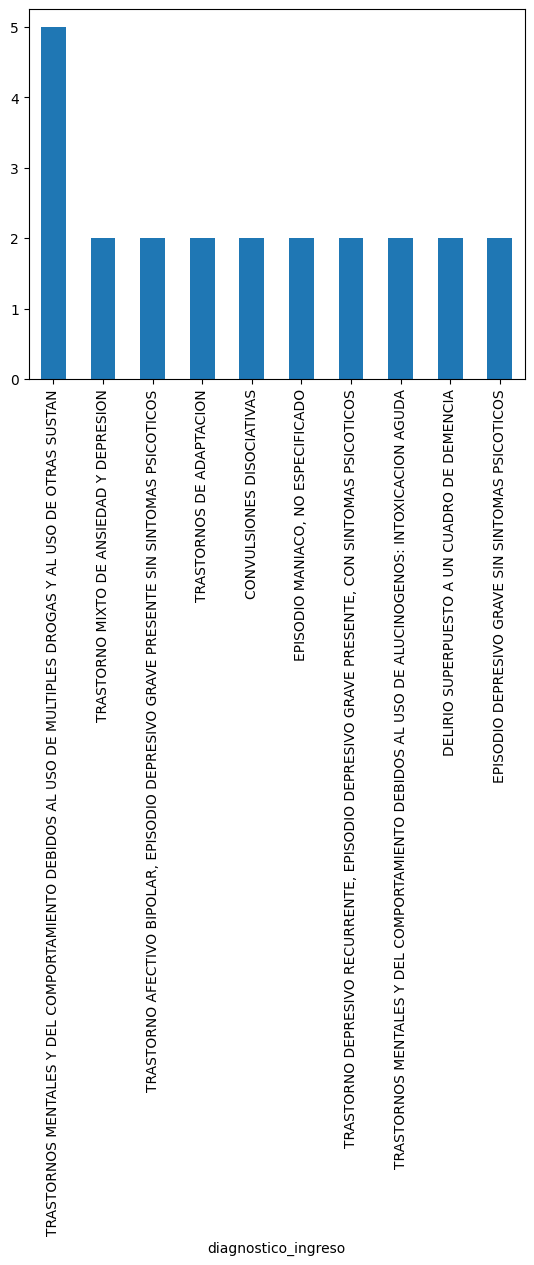

In [24]:
df["diagnostico_ingreso"].value_counts().head(10).plot(kind='bar')

In [26]:
df["Año diagnóstico"].unique()

array([2023, 2022], dtype=int64)

In [40]:
algo_inters= input("Ingresa enfermedades de interes o palabras: ").upper()
#algo_inters= input("Ingresa enfermedades de interes o palabras: ").upper()
lista=set(df["diagnostico_ingreso"].unique())
try:
    #lista_string = "ansiedad depresion panico".split(" ")
    lista_filtrada=[x for x in lista if algo_inters in x]
    if len(lista_filtrada)>0:
        print(lista_filtrada)
        info_filtrada=df[df["diagnostico_ingreso"].isin(lista_filtrada)]
        print(info_filtrada)
    else:
        print("No encontre tus keywords")
except:
    print("Hubo error intenta de nuevo")

['TRASTORNO DE ANSIEDAD GENERALIZADA', 'OTROS TRASTORNOS DE ANSIEDAD MIXTOS', 'TRASTORNO MIXTO DE ANSIEDAD Y DEPRESION', 'TRASTORNO DE ANSIEDAD , NO ESPECIFICADO', 'TRASTORNO FOBICO DE ANSIEDAD, NO ESPECIFICADO', 'OTROS TRASTORNOS FOBICOS DE ANSIEDAD', 'TRASTORNO DE PANICO [ANSIEDAD PAROXISTICA EPISODICA]', 'TRASTORNO DE ANSIEDAD, ORGANICO']
                                   diagnostico_ingreso codigo_dx_ingreso  \
0              TRASTORNO MIXTO DE ANSIEDAD Y DEPRESION              F412   
9              TRASTORNO DE ANSIEDAD , NO ESPECIFICADO              F419   
23                  TRASTORNO DE ANSIEDAD GENERALIZADA              F411   
24                     TRASTORNO DE ANSIEDAD, ORGANICO              F064   
39       TRASTORNO FOBICO DE ANSIEDAD, NO ESPECIFICADO              F409   
53                 OTROS TRASTORNOS DE ANSIEDAD MIXTOS              F413   
59                OTROS TRASTORNOS FOBICOS DE ANSIEDAD              F408   
67   TRASTORNO DE PANICO [ANSIEDAD PAROXISTICA E

**Columnas de interes**: X1, X2 y X3 porque
